*Supporting textbook chapters for week 10: Chapters 10.1 and 10.2*

Week 10, topics:
* Random number generation
* Monte Carlo integration

# Random numbers

## General requirements

Why we need random numbers:

* For randomly sampling a domain (today)
* Monte Carlo integration (today)
* Monte Carlo simulations (next week)
* Stochastic algorithms (we'll see some next week)
* Cryptography

Q: How can a computer generate random numbers? 


What is a useful random sequence of numbers?
* Follows some desired distribution
* Unpredictable on a number-by-number basis
* Fast to generate (we may need billions of them)
* Long period (we may need billions of them)
* Uncorrelated

Problems with actually random numbers:
* generally slow, expensive to generate,
* hard/impossible to reproduce for debugging
* Often hard to characterize underlying distribution

Q: How can a computer generate random numbers?

![](xkcd211.png)

http://xkcd.com/211

Q: How can a computer generate random numbers? 
A: It can't! 

The computer can't do anything randomly.

2 options:
* find physical process that actually is random, have computer store info from that to provide a random number
* Use an algorithm for generating a sequence of numbers that approximates the properties of random numbers. This is called a "Pseudorandom Number Generator" (PRNG) or a "Deterministic Random Bit Generator" (DRBG).

## Common Tests

![](uR4WuQ0.png)
https://dilbert.com/strip/2001-10-25

### Correlations

Simple pairwise correlations:
$$\epsilon(N, n) = \frac1N \sum_{i=1}^{N}x_i x_{i+n} - \mathrm E[x^2]$$
* $N =$ number of data points
* $n = $ correlation "distance"
* $\mathrm E[x] = \sum_{i=1}^N x_i/N$, the expected value.

We want to avoid correlations between pairs of numbers.

Left: bad PRNG; right: Mersenne Twister

![From Katzgrabber, "Random Numbers in Scientific Computing: an Introduction" (arXiv: 1005.4117)](Mersenne.png)

### Moments

$k^\text{th}$ moment of sequence of $N$ elements, $\mu(N, k)$:
$$\mu(N, k) = \mathrm E[x^k]$$

We want to ensure moments of random number distributions also have desired properties.

### Other tests

* Overlapping permutations:
    * For example, analyze orders of five consecutive random numbers. There are $5! (=5\times4\dots)$ possible permutations. They should occur with equal probability.
* ...

## Linear Congruential Generator

* The sequences of numbers produced by a PRNG seem random, but they are reproducible if you start with the same "seed" value.
* For example (actually a bad choice for a PRNG, but good for illustration): "Linear Congruential Random Number Generator":
$$x_{i+1} = (ax_i + c)\mod m$$
    E.g. in Python:
    `x[i+1] = (a*x[i] + c) % m`.
* $x_0$ would be the seed,
* $m$: large integer, determines period,
* For good results:
    * $c$ relatively prime to $m$,
    * $a-1$ is a multiple of $p$ for every prime divisor $p$ of $m$
        (e.g., $a-1$ is multiple of $4$ if $m$ is multiple of $4$).
* How does computer pick seed $x_0$?  Taking system time is common (dangerous in parallel if all processors use the same seed!).

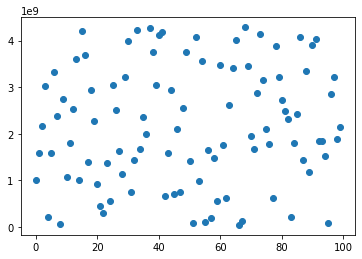

In [1]:
# Newman's lcg.py
from pylab import plot, show

N = 100
a = 1664525
c = 1013904223
m = 4294967296
x = 1
results = []

for i in range(N):
    x = (a*x+c) % m
    results.append(x)
plot(results, "o")
show()


Benefits: 
* much faster than real random number generators
* good for testing code since you can supply the same 'seed' for reproducible outcome using the `random.seed()` function:

    `random.seed(4219)`
    
    `x = random.random()`

    will always produce the same `x` (that is, 0.03738057695923325).

* easy to generate many different sequences, just pick many different seeds.


Better methods?

* We want to avoid correlations between pairs of numbers
* Can do lots of test that PRNGs producing right "statistics" of random numbers!
* Python uses a Mersenne twister

Functions in `random.py` most likely to use (assuming `import random`):
* `random()`: gives a random float uniformly distributed in a the range $[0, 1)$ (all values have equal probability of being selected),
* `randrange(m, n)`: Gives a random integer from `m` to `n-1`, inclusive.

* If you need a uniformly distributed random float outside the range $[0,1)$, say in range $[a,b)$, then just multiply your answer by $(b-a)$ and shift the argument. For example:

    `num = random()`

    `shiftnum = (b-a)*num + a`
    
More resources:

https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html

https://docs.python.org/3/library/random.html

In [ ]:
# re-do random walk here in class
from random import randrange

# define function that moves left, right, up or down by one at each step depending randrange
# start from position (x, y) = (0, 0)
# loop over 10 steps to see where you land.

## Non-Uniform distributions

What if you need a random number from a non-uniform distribution?

* Get a uniformly distributed random number, then use a transformation to make it seem like it comes from a non-uniform distribution.

* Consider source of random floats $z$ from a distribution with probability density $q(z)$, i.e., the probability of generating a number in the interval $z$ to $z+\text dz$ is:
$$q(z)\text dz$$

* For a uniform distribution over [0, 1), $q(z)=1$ because for all d$z$, equal probability of number being chosen.


* Now consider transformation of $z$ into new variable, say $x$ using:
    $$x=x(z)$$
* Then $x$ is also a random number, but will have some other probability distribution, call it $p(x)$.
* The probability of generating a value of $x$ between $x$ and $x+\text dx$, with $$\text dx = \frac{\text d x}{\text d z}\text dz,$$ is by definition equal to the probability of generating a value of $z$ between the corresponding $z$ and $z + \text dz$:
    $$p(x) \text dx = q(z) \text dz, \quad \text{where}\ x=x(z)$$


* Goal: find a function $x(z)$ so that $x$ has the distribution we want.
* Then we can use `random()` to get a uniformly distributed random number $z$ and transform it to $x$ using:
$$q(z) = 1 \quad \text{over}\quad [0,1)$$
$$q(z)\text dz = p(x)\text d x$$
$$\Rightarrow \int_0^z 1 \text d z' = z = \int_0^{x(z)} p(x')\text d x'.$$
* Plug in your $p(x)$ for the probability distribution you need and integrate to find $z(x)$ (if you can!)
* Even then: might not be possible to solve for $x(z)$.

Example: exponential distribution
$$q(z) = 1 \quad \text{over}\quad [0,1)$$
$$p(x) = a\exp(-a x)  \quad \text{over}\quad [0,\infty)$$
$$\Rightarrow\ z = \int_0^{x(z)}a\exp(-ax')\text d x' = 1 - \exp(-ax)$$
$$\Rightarrow\ x = -\frac{\ln(1-z)}a.$$
* Draw a number $z$ in $[0,1)$,
* $x(z)$ has the desired distribution.

* Simulate random physical processes like diffusion, radioactive decay, Brownian motion.

![](Lab10-Q1a.png)

# Monte Carlo integration

![I, Katonams, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=2480853](Whole_monaco.jpg)
Monaco and Monte-Carlo.
The casino is right below the small, almost-closed harbour if you extrapolate the ridge line on top of the picture.

## What it is 

Solving Integrals:  "Monte Carlo Integration"
* Sounds great in theory. Would never work in practice without computers.
* 3 Monte Carlo techniques you will use in the lab:
    * "hit or miss" or "standard" Monte Carlo
    * "mean value" Monte Carlo
    * "importance sampling" Monte Carlo	


You've already learned a bunch of different methods for integrating, why introduce another one?  (Especially since its convergence/error properties are worse than the other methods):

Reason 1: Good for pathological functions or just fast-varying functions. 

![Newman's 10.4](fig10-4.png)

Reason 2: MUCH faster for multi-dimensional integrals.

The "curse of dimensionality":
* For a dimension $d$ integral, you need $O(n^d)$ grid points.
* E.g. with trapezoid, Simpson or Gaussian integration: for $n=1000$ points, a $10$-$d$ integral need $10^{30}$ grid points!

![From https://tenor.com/view/david-rose-schitts-creek-david-ew-gif-14149250](Ew.gif)

* Or: if you can afford $N$ points, your grid has side length $O(N^{1/d})$.
* For trapezoid integration, error $\epsilon = O(h^2) \propto 1/N^{2/d}$.
* E.g., for a 10-$d$ integral, $\epsilon \propto 1/N^{1/5}$.

* Monte Carlo: $\epsilon \propto 1/N^{1/2}$, regardless of $d$.

Reason 3: much easier to implement in complicated domains (i.e., complicated boundaries of integration).

Good luck finding the volume of the Blob with Gaussian quadrature!

![](The_Blob_(1958)_theatrical_poster.jpg)

## Implementation

Use random numbers to pick points at which to evaluate integrand.

![](MC_Implementation.png)

* Simple and flexible.
* Can generalize to focus on important parts.

### Hit-or-miss MC

* If your function "fits" in a finite region where we want to integrate from $x=0$ to $x=2$:
$$f(x) = \sin^2\left[\frac{1}{x(2-x)}\right]$$
![Newman's 10.4](fig10-4.png)
* function fits in box of height 1, width 2. 
* Define area of box: $A$ (this is important! It is the piece of info we will leverage).
* Integral of function is shaded area in the box  (call it $I$).

* Probability that your random point falls in the shaded region is $p = I/A$.
* Algorithm:
    1. Randomly pick $N$ locations $(x, y)$ in the box (lots of them).
    2. Count the number of locations that are in the shaded region (call the count $k$).
    3. The fraction of points in the shaded region is $k/N$. This approximates the probability $p$.
Solve for $I$:
$$P = \frac{I}{A} \approx \frac{k}N\ \Rightarrow\ I\approx \frac{kA}{N}.$$

Can estimate the error on the integral (text gives derivation on page 467 from probability theory):

* The *Expected Error* (standard deviation):
$$\sigma = \sqrt{\frac{I(A-I)}{N}}.$$
* Notice it varies as $N^{-1/2}$. This is **very slow**!
* Compare:
    * Trapezoid Rule: error varies as $N^{-2}$,
	* Simpson's Rule: error varies as $N^{-4}$.
* (but careful to compare apples with apples, see earlier!)
* This is why you only use Monte Carlo integration if you absolutely have to.

Example: exercise 10.5(a) from the text.

Write a program to evaluate
$$I = \int_0^2 \sin\left[\frac1{x(2-x)}\text d x\right]$$
using the "hit-or-miss" method.
* Use $N= 10^4$ points.
* Also evaluate the error on your method.

In [2]:
# Re-do here in class
import numpy as np  # I'll use the numpy random functionalities

def f(x): return np.sin(1/((x-a)*(b-x)))**2  # the function to integrate

# define parameters

# loop over samples; in loop, have an if statement to check wether the point is above of below the curve

# compute fraction of points below.

# compute error

## Mean value MC

* Use the definition of an average (or mean value):
$$I = \int_a^b f(x)\text d x,$$
$$\left<f\right> = \frac1{b-a}\int_a^b f(x) \text d x = \frac{I}{b-a}$$
$$\Rightarrow\ I = (b-a)\left<f\right>$$

* Use random numbers for $x$ to estimate $\left<f\right>$. Evaluate $f$ at $N$ random $x$'s, then calculate:
$$\left<f\right>\approx\frac1N\sum_{i=1}^N f(x_i) \ \Rightarrow \ I\approx \frac{b-a}{N}\sum_{i=1}^N f(x_i).$$
* Different from "hit-or-miss": we chose $N$ random point over $(x, y)$.

Error estimate.
* Can estimate the error on the integral (text gives derivation on pages 468-469 from probability theory):
    "Expected Error":
$$\sigma = (b-a)\sqrt{\frac{\text{var} f}N}$$
$$\text{var} f = \left<f^2\right> - \left< f \right>^2.$$
* Notice it also varies as $N^{-1/2}$.
    However, it turns out the leading constant is smaller than with the hit or miss method.
    *Note: I have not been able to figure out if this result is always true, or usually true. Newman's wording seems to indicate that it is always true, but I can't quite figure out why.*

Example: exercise 10.5(b) from the text.

Write a program to evaluate
$$I = \int_0^2 \sin\left[\frac1{x(2-x)}\text d x\right]$$
using the mean value method.
* Use $N = 10000$ points.
* Also evaluate the error on your method.

In [ ]:
import numpy as np

def f(x): return np.sin(1/((x-a)*(b-x)))**2

N = 10000
a = 0.
b = 2.
k = 0  # will contain the average
k2 = 0  # will be used for variance

for i in range(N):
    x = (b-a)*np.random.random()
    k += f(x)
    k2 += f(x)**2

I = k * (b-a) / N
print(I)

# error
var = k2/N - (k/N)**2  # variance <f**2> - <f>**2
sigma_MV = (b-a)*np.sqrt(var/N)  # MV stands for Mean Value
print('error = ', sigma_MV)
print('recall error in hit-or-miss = ', sigma_HM)

In [ ]:
# Re-do in class here (copy previous example and adjust):
def f(x): return np.sin(1/((x-a)*(b-x)))**2

# define parameters (re-use some from previous example)

# loop over samples; in loop, have an if statement to check wether the point is above of below the curve

# compute fraction of points below.

# compute error

## Importance sampling MC

* Good to use when your integrand contains a divergence: want to place more points in region where the integrand is large to better estimate the integral, also when you want to integrate out to infinity
* Illustrative example (obviously a bad one for Monte-Carlo, but good for making my point):
$$f(x) = 1\quad \text{for}\quad c<x<d, \qquad f(x) = 0\quad \text{otherwise}.$$

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 1000)
f = 0.*x
for i, xs in enumerate(x):
    if 0.33 < xs < 0.35:
        f[i] = 1.
plt.plot(x, f)

* Easy to miss the region between $c$ and $d$ with uniformly sampled points
* evaluating the integral many times using Mean Value or Hit/Miss MC (with different randomly sampled points) can give very different answers, much larger than the expected error

* Solution: sample "important" regions more frequently.
    I.e., come up with a non-uniformly distributed set of random numbers.
    This is called "Importance Sampling".

* Text shows that using a weight function $w(x)$, you can always write:
$$I = \int_a^b f(x)\text d x = \underbrace{\left<\frac{f(x)}{w(x)}\right>_w}_{weighted\\ average}\int_a^b w(x)\text d x.$$

* Goal: find a weight function that gets rid of pathologies in integrand $f(x)$.
    E.g., if $f(x)$ has a divergence, factor the divergence out and hence get a sum (in the $\left<\right>$) that is well behaved (i.e. doesn't vary much each time you do the integral).

Example:
$$I = \int_0^1 \frac{x^{-1/2}}{1 + \exp(x)}\text d x,$$
diverges as $x\to 0$ because of numerator.

Fine, let $w(x)= numerator$.
Then
$$\left<\frac{f(x)}{w(x)}\right> = \frac1N \sum_{i=1}^{N}\frac{f(x_i)}{w(x_i)} = \frac1N \sum_{i=1}^{N}\frac{1}{1 + \exp(x_i)},$$
which is much better behaved than 
$$\left<f(x)\right> = \frac1N \sum_{i=1}^{N}\frac{x^{-1/2}}{1 + \exp(x_i)}$$

* When you've chosen your weight function, you then need to make sure to randomly sample points from the non-uniform distribution:
    $$p(x) = \frac{w(x)}{\int_a^b w(x)\text d x}$$
    Use the transformation method described earlier in this lecture to take a uniformly distribution random $z$ and find the corresponding $x$ for this distribution. 
    
* "Expected error":
    $$\sigma = \sqrt{\frac{\text{var}(f/w)}{N}}\int_a^b w(x)\text d x.$$
    Yes, it also varies as $N^{-1/2}$.   If you do the integral many times, your values should mostly fall within the expected error.
